In [20]:
# gather and First Glance at the Data
import pandas as pd

In [21]:
# read the CSV file
data = pd.read_csv('../data/creditcard.csv')
print(data.describe())

# only use the 'Amount' and 'V1', ..., 'V28' features
features = ['Amount'] + ['V%d' % number for number in range(1, 29)]

# the target variable which we would like to predict, is the 'Class' variable
target = 'Class'

# now create an X variable (containing the features) and an y variable (containing only the target variable)
X = data[features]
Y = data[target]

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.165980e-15  3.416908e-16 -1.373150e-15  2.086869e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.490107e-15 -5.556467e-16  1.177556e-16 -2.406455e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [22]:
# include all the dependendies
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt

In [23]:
# define the model
model = Sequential()
model.add(Dense(units=58,
    input_dim=29,
    activation='relu'))
model.add(Dense(units=40,
    activation='relu'))
model.add(Dense(units=15,
    activation='relu'))

# output layer
model.add(Dense(units=1,
    activation='sigmoid'))

# load pre-trained model weights
model.load_weights('credit_model.h5')

# compile
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

In [24]:
# training model
history = model.fit(X, Y,
    validation_split=0.20,
    epochs=10,
    batch_size=32)

model.save_weights('credit_model.h5')

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 41s 181us/step - loss: 0.0045 - acc: 0.9995 - val_loss: 0.0043 - val_acc: 0.9996
Epoch 2/10
227845/227845 [==============================] - 41s 180us/step - loss: 0.0039 - acc: 0.9995 - val_loss: 0.0042 - val_acc: 0.9995
Epoch 3/10
227845/227845 [==============================] - 46s 204us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.0042 - val_acc: 0.9994
Epoch 4/10
227845/227845 [==============================] - 44s 193us/step - loss: 0.0038 - acc: 0.9995 - val_loss: 0.0042 - val_acc: 0.9995
Epoch 5/10
227845/227845 [==============================] - 42s 184us/step - loss: 0.0041 - acc: 0.9995 - val_loss: 0.0042 - val_acc: 0.9995
Epoch 6/10
227845/227845 [==============================] - 41s 181us/step - loss: 0.0037 - acc: 0.9995 - val_loss: 0.0045 - val_acc: 0.9994
Epoch 7/10
227845/227845 [==============================] - 41s 182us/step - loss: 0.0038 - acc: 0.9995

In [25]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

284807/284807 [==============================] - 15s 53us/step

acc: 99.96%


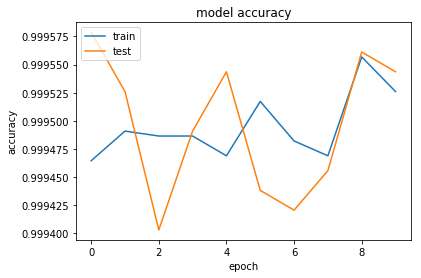

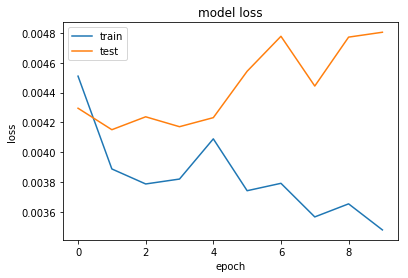

In [26]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()